<h1 align="left"><font size="5"><b>House Sales in King County, USA</b> </font></h1>

The aim of this report is to determine the market price of houses in King County, including Seattle, using various features of the properties. The goal is to provide a comprehensive analysis of the data, develop a predictive model, and evaluate its performance to aid the Real Estate Investment Trust in making informed investment decisions in residential real estate.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Module-1:-Importing-Data-Sets">1:-Introduction</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-2:-Import Libraries">2:Import Libraries</a> </li>
    <li><a href="#Module-3:-Importing-Data-Sets">3: Importing Data </a></li>
    <li><a href="#Module-4:-Data-Wrangling">4: Data Wrangling</a> </li>
    <li><a href="#Module-5:-Exploratory-Data-Analysis">5: Exploratory Data Analysis</a></li>
    <li><a href="#Module-6:-Model-Development">6: Model Development and Evaluation </a></li>
    <li><a href="#Module-7:-Model-Evaluation-and-Refinement">7: Model Refinement</a></li>
    <li><a href="#Module-8:-Model-Evaluation-and-Refinement">8: Conclusion</a></li>
</a></li>
</div>
</div>

<hr>


<div id="Introduction">
    <h2>1.Introduction</h2>

Investing in residential real estate requires a deep understanding of market dynamics and property valuation. This report focuses on predicting house prices in King County, leveraging a dataset that includes homes sold between May 2014 and May 2015. The dataset encompasses a range of features such as the number of bedrooms, bathrooms, square footage, and more. By exploring and modeling these features, we aim to provide valuable insights into the factors influencing house prices and develop a reliable predictive model.

## About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


<hr>
<div id="import_libraries">
    <h2>2.Import Libraries</h2>
</div>


The dataset was imported into a pandas DataFrame named df. This dataset includes various features of houses such as the number of bedrooms, bathrooms, square footage, location coordinates, and sale prices.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import gc, sys
%matplotlib inline

<hr>
<div id="Importing Data Sets">
    <h2>3.Importing Data Sets</h2>
</div>

Load the csv:


In [7]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=0)
print("There are " + str(len(df)) + " observations in the dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

There are 21613 observations in the dataset.
There are 22 variables in the dataset.


In [8]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df[df.columns].dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<hr>
<div id="Data Wrangling">
    <h2>4.Data Wrangling</h2>
</div>

To prepare the data for analysis, several preprocessing steps were undertaken. A new feature set was created from the date feature, including day, month, duration since construction (dur), and a binary indicator for renovation (renovated).

In [10]:
df['r_date'] = pd.to_datetime(df['date'])
df['year'] = pd.to_datetime(df['r_date']).dt.year
df['month']=pd.to_datetime(df['r_date']).dt.month
df['dur']=df['year']-df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
data=df.sort_values(by='r_date')
data.drop(['Unnamed: 0', 'id','date','yr_built'], axis=1, inplace=True)
data.head()
del df
gc.collect()

24

Missing data was identified using the following code, revealing that the `bedrooms` and `bathrooms` columns had 13 and 10 missing values, respectively.

In [12]:
#IDENTIFING MISSING VALUES
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print('')

price
price
False    21613
Name: count, dtype: int64

bedrooms
bedrooms
False    21600
True        13
Name: count, dtype: int64

bathrooms
bathrooms
False    21603
True        10
Name: count, dtype: int64

sqft_living
sqft_living
False    21613
Name: count, dtype: int64

sqft_lot
sqft_lot
False    21613
Name: count, dtype: int64

floors
floors
False    21613
Name: count, dtype: int64

waterfront
waterfront
False    21613
Name: count, dtype: int64

view
view
False    21613
Name: count, dtype: int64

condition
condition
False    21613
Name: count, dtype: int64

grade
grade
False    21613
Name: count, dtype: int64

sqft_above
sqft_above
False    21613
Name: count, dtype: int64

sqft_basement
sqft_basement
False    21613
Name: count, dtype: int64

yr_renovated
yr_renovated
False    21613
Name: count, dtype: int64

zipcode
zipcode
False    21613
Name: count, dtype: int64

lat
lat
False    21613
Name: count, dtype: int64

long
long
False    21613
Name: count, dtype: int64

sqft_living15
sqft

In [13]:
mean=data['bedrooms'].mean()
data['bedrooms'].replace(np.nan,mean, inplace=True)

In [14]:
mean=data['bathrooms'].mean()
data['bathrooms'].replace(np.nan,mean, inplace=True)

In [15]:
print("number of NaN values for the column bedrooms :", data['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", data['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [16]:
print("There are " + str(len(data)) + " observations in the dataset.")
print("There are " + str(len(data.columns)) + " variables in the dataset.")
data.head()

There are 21613 observations in the dataset.
There are 23 variables in the dataset.


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,r_date,year,month,dur,renovated
16768,437500.0,3.0,2.25,1970,35100,2.0,0,0,4,9,...,98027,47.4635,-121.991,2340,35100,2014-05-02,2014,5,37,0
9596,790000.0,3.0,2.50,2600,4750,1.0,0,0,4,9,...,98117,47.6833,-122.400,2380,4750,2014-05-02,2014,5,63,0
9587,675000.0,5.0,2.50,2820,67518,2.0,0,0,3,8,...,98029,47.5794,-122.025,2820,48351,2014-05-02,2014,5,35,0
20602,555000.0,4.0,2.50,3310,6500,2.0,0,0,3,8,...,98065,47.5150,-121.870,2380,5000,2014-05-02,2014,5,2,0
11577,440000.0,4.0,2.25,2160,8119,1.0,0,0,3,8,...,98006,47.5443,-122.177,1850,9000,2014-05-02,2014,5,48,0


The missing values were handled appropriately, and the updated DataFrame was named data.

<hr>
<div id="Exploratory Data Analysis">
    <h2>5.Exploratory Data Analysis</h2>
</div>

In [46]:
data.drop(['r_date','year'], axis=1, inplace=True)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,dur,renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,43.317818,0.042289
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,29.375493,0.201253
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,-1.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,115.000000,1.000000


To understand the relationship between the features and the target variable price, a sorted correlation analysis was performed. The feature sqft_living had the highest positive correlation with price (0.702035), while dur had the highest negative correlation (-0.053951).

In [47]:
data.corr()[['price']].sort_values(by='price')

,price
dur,-0.053951
zipcode,-0.053203
month,-0.010081
long,0.021626
condition,0.036362
sqft_lot15,0.082447
sqft_lot,0.089661
renovated,0.126092
yr_renovated,0.126434
floors,0.256794


In [48]:
Price_bins=[data['price'].quantile(0.25),data['price'].quantile(0.50),data['price'].quantile(0.75),np.inf]
sqft_living_bins=[data['sqft_living'].quantile(0.25),data['sqft_living'].quantile(0.90),data['sqft_living'].quantile(0.50)]
bathrooms_bins=[data['bathrooms'].quantile(0.25),data['bathrooms'].quantile(0.90),data['bathrooms'].quantile(0.50)]
bedrooms_bins=[data['bedrooms'].min(),data['bedrooms'].quantile(0.90),data['bedrooms'].quantile(0.50)]

In [49]:
group_names = ['Low', 'Medium', 'High']#labelling 
data['price_bins'] = pd.cut(data["price"], Price_bins, labels=group_names, include_lowest=True)#assigning label to a values
data['price_bins']

16768       Low
9596       High
9587       High
20602    Medium
11577       Low
          ...  
7898        NaN
928         Low
5637        Low
13053       Low
16594      High
Name: price_bins, Length: 21613, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [50]:
missing=data[['price_bins']].isnull()
for column in missing.columns.values.tolist():
    print (missing[column].value_counts())
    print('')

price_bins
False    16210
True      5403
Name: count, dtype: int64



In [51]:
clean = data.dropna(subset=['price_bins'])
clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,dur,renovated,price_bins
16768,437500.0,3.0,2.25,1970,35100,2.0,0,0,4,9,...,0,98027,47.4635,-121.991,2340,35100,5,37,0,Low
9596,790000.0,3.0,2.50,2600,4750,1.0,0,0,4,9,...,0,98117,47.6833,-122.400,2380,4750,5,63,0,High
9587,675000.0,5.0,2.50,2820,67518,2.0,0,0,3,8,...,0,98029,47.5794,-122.025,2820,48351,5,35,0,High
20602,555000.0,4.0,2.50,3310,6500,2.0,0,0,3,8,...,0,98065,47.5150,-121.870,2380,5000,5,2,0,Medium
11577,440000.0,4.0,2.25,2160,8119,1.0,0,0,3,8,...,0,98006,47.5443,-122.177,1850,9000,5,48,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,855000.0,3.0,1.75,1900,4000,1.0,0,0,3,7,...,0,98103,47.6854,-122.331,1880,4000,5,50,0,High
928,359000.0,2.0,2.75,1370,1140,2.0,0,0,3,8,...,0,98133,47.7052,-122.343,1370,1090,5,6,0,Low
5637,450000.0,5.0,2.00,1870,7344,1.5,0,0,3,7,...,0,98007,47.5951,-122.144,1870,7650,5,55,0,Low
13053,445500.0,2.0,1.75,1390,6670,1.0,0,0,3,6,...,0,98115,47.6914,-122.308,920,6380,5,74,0,Low


In [52]:
clean['price_bins'].unique()

['Low', 'High', 'Medium']
Categories (3, object): ['Low' < 'Medium' < 'High']

The price data was categorized into three levels: low (<3.219500e+05), medium (<4.500000e+05), and high (<7.700000e+06). Histogram plots were used to compare the categorized price data with other features such as bathrooms, bedrooms, and square footage of living space. These features were also categorized to match the price data for better comparison.

Text(0.5, 1.0, 'price_bins vs sqft_living_bins')

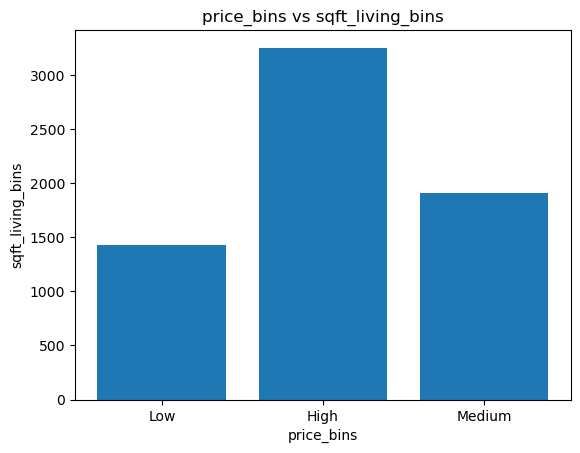

In [53]:
plt.bar(clean['price_bins'].unique(), sqft_living_bins)
plt.xlabel("price_bins")
plt.ylabel("sqft_living_bins")
plt.title("price_bins vs sqft_living_bins")

Text(0.5, 1.0, 'price_bins vs bedrooms_bins')

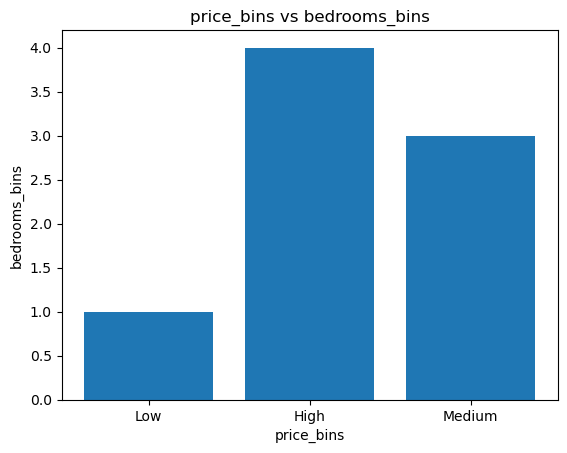

In [54]:
plt.bar(clean['price_bins'].unique(), bedrooms_bins)
plt.xlabel("price_bins")
plt.ylabel("bedrooms_bins")
plt.title("price_bins vs bedrooms_bins")

Text(0.5, 1.0, 'price_bins vs Bathroom bins')

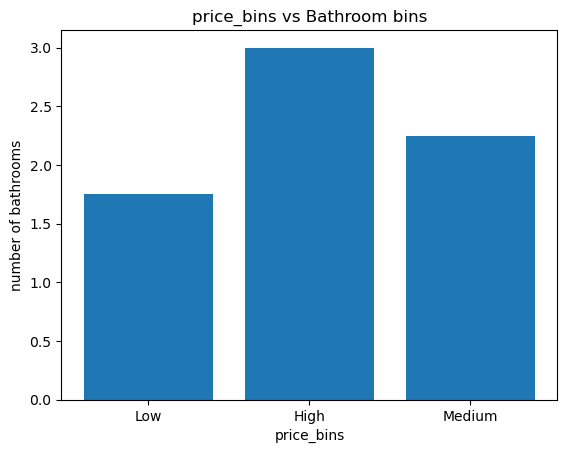

In [55]:
plt.bar(clean['price_bins'].unique(), bathrooms_bins)
plt.xlabel("price_bins")
plt.ylabel("number of bathrooms")
plt.title("price_bins vs Bathroom bins")

<hr>
<div id="Model Development and Evaluation">
    <h2>6.Model Development and Evaluation</h2>
</div>

The dataset was split into independent variables (X) and the target variable (Y). The data was split three times with different test sizes (10%, 25%, 0-90%). Each split X training set was transformed using the PolynomialFeatures object for different orders ranging from 1 to 3. A linear regression model was then applied, and the R-squared metric was evaluated.

In [56]:
Y=clean[['price']].values
clean=clean.drop(['price','price_bins'], axis=1)
X=clean.values

In [57]:
clean

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,dur,renovated
16768,3.0,2.25,1970,35100,2.0,0,0,4,9,1970,0,0,98027,47.4635,-121.991,2340,35100,5,37,0
9596,3.0,2.50,2600,4750,1.0,0,0,4,9,1700,900,0,98117,47.6833,-122.400,2380,4750,5,63,0
9587,5.0,2.50,2820,67518,2.0,0,0,3,8,2820,0,0,98029,47.5794,-122.025,2820,48351,5,35,0
20602,4.0,2.50,3310,6500,2.0,0,0,3,8,3310,0,0,98065,47.5150,-121.870,2380,5000,5,2,0
11577,4.0,2.25,2160,8119,1.0,0,0,3,8,1080,1080,0,98006,47.5443,-122.177,1850,9000,5,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,3.0,1.75,1900,4000,1.0,0,0,3,7,1300,600,0,98103,47.6854,-122.331,1880,4000,5,50,0
928,2.0,2.75,1370,1140,2.0,0,0,3,8,1080,290,0,98133,47.7052,-122.343,1370,1090,5,6,0
5637,5.0,2.00,1870,7344,1.5,0,0,3,7,1870,0,0,98007,47.5951,-122.144,1870,7650,5,55,0
13053,2.0,1.75,1390,6670,1.0,0,0,3,6,720,670,0,98115,47.6914,-122.308,920,6380,5,74,0


**DATA SPLITING**

The data was split three times with different test sizes (10%, 25%, 75%). Each split X training set was transformed using the PolynomialFeatures object for different orders ranging from 1 to 3. A linear regression model was then applied, and the R-squared metric was evaluated.

In [58]:
#library: from sklearn.model_selection import train_test_split
#function: train_test_split(independent var., target variable.,% of the data for testing,random_state)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
#creates a model with good accuracy and low precision

number of test samples : 1621
number of training samples: 14589


In [59]:
#library: from sklearn.model_selection import train_test_split
#function: train_test_split(independent var., target variable.,% of the data for testing,random_state)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.50, random_state=42)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
#creates a model with good accuracy and low precision

number of test samples : 1621
number of training samples: 14589


In [60]:
#library: from sklearn.model_selection import train_test_split
#function: train_test_split(independent var., target variable.,% of the data for testing,random_state)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.90, random_state=42)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
#creates a model with good accuracy and low precision

number of test samples : 1621
number of training samples: 14589


Text(0.5, 1.0, 'R^2 Using Test Data')

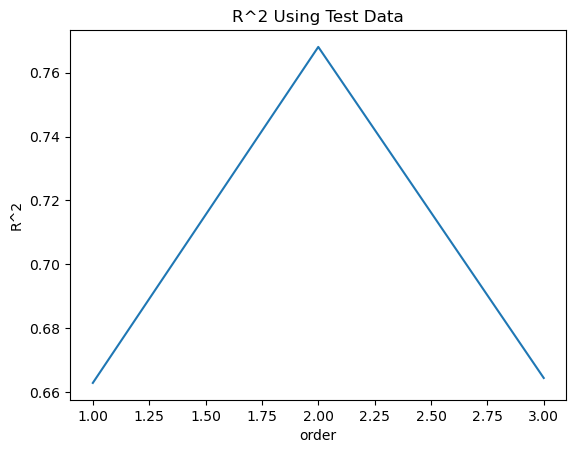

In [61]:
##test size=10%
lre=LinearRegression()
Rsqu_test = [] # array for storing the r-square for each order polynomial
order = [1, 2, 3]
#evaluating r-squared of a linear equation with different order polynomial that represent the independent variable
for n in order: 
    pr = PolynomialFeatures(degree=n) #polynomial object for transforming the independent data set to polynomial function(continous)
    #transform the independent variable
    x_train_pr = pr.fit_transform(x_train)#a polynomial feature with all the possible coefficent
    x_test_pr = pr.fit_transform(x_test)    
    #a linear fit with the transformed x training data set (TRAINING)
    lre.fit(x_train_pr, y_train)
    #determine the r-squared with the x transformed testing set (TESTING)
    Rsqu_test.append(lre.score(x_test_pr, y_test))
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0.5, 1.0, 'R^2 Using Test Data')

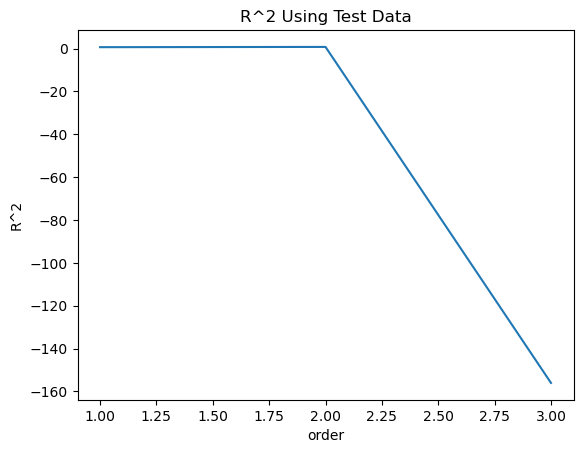

In [62]:
lre1=LinearRegression()
##test size=50%
Rsqu_test1 = [] # array for storing the r-square for each order polynomial
order = [1, 2, 3]
#evaluating r-squared of a linear equation with different order polynomial that represent the independent variable
for n in order: 
    pr = PolynomialFeatures(degree=n) #polynomial object for transforming the independent data set to polynomial function(continous)
    #transform the independent variable
    x_train_pr1 = pr.fit_transform(x_train1)#a polynomial feature with all the possible coefficent
    x_test_pr1 = pr.fit_transform(x_test1)    
    #a linear fit with the transformed x training data set (TRAINING)
    lre1.fit(x_train_pr1, y_train1)
    #determine the r-squared with the x transformed testing set (TESTING)
    Rsqu_test1.append(lre1.score(x_test_pr1, y_test1))
plt.plot(order, Rsqu_test1)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0.5, 1.0, 'R^2 Using Test Data')

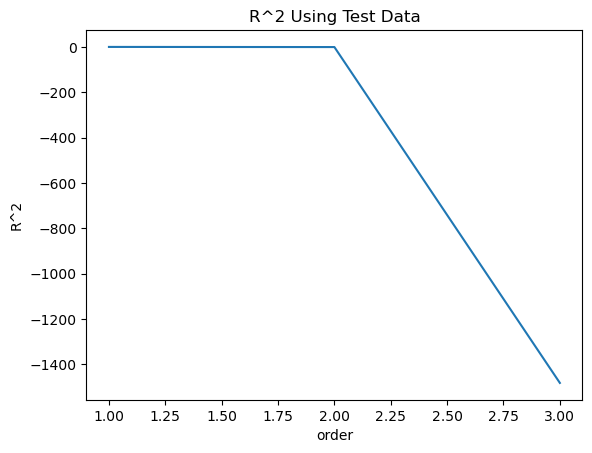

In [63]:
lre2=LinearRegression()
##test size=90%
Rsqu_test2 = [] # array for storing the r-square for each order polynomial
order = [1, 2, 3]
#evaluating r-squared of a linear equation with different order polynomial that represent the independent variable
for n in order: 
    pr = PolynomialFeatures(degree=n) #polynomial object for transforming the independent data set to polynomial function(continous)
    #transform the independent variable
    x_train_pr2 = pr.fit_transform(x_train2)#a polynomial feature with all the possible coefficent
    x_test_pr2 = pr.fit_transform(x_test2)    
    #a linear fit with the transformed x training data set (TRAINING)
    lre2.fit(x_train_pr2, y_train2)
    #determine the r-squared with the x transformed testing set (TESTING)
    Rsqu_test2.append(lre2.score(x_test_pr2, y_test2))
plt.plot(order, Rsqu_test2)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

It was discovered that a test size of 10% and a polynomial order of 2 had the best R-squared metric (0.7680971592654088). A density plot was used to visualize the difference between the predicted and test data.

0.7680971592654088


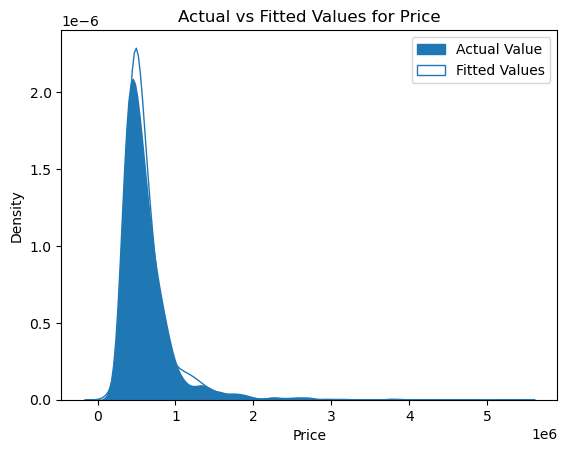

In [64]:
##test size=10%
Tr_ = PolynomialFeatures(degree=2)
lr_=LinearRegression()
#transformation
X_train_tr=Tr_.fit_transform(x_train)
X_test_tr=Tr_.fit_transform(x_test)
#training
lr_.fit(X_train_tr, y_train)
# Predict on the test set
y_pred = lr_.predict(X_test_tr)
    
# Calculate R-squared error
print(r2_score(y_test, y_pred))

sns.kdeplot(y_test, color="r", label="Actual Value",fill=True, alpha=1)#testing set
sns.kdeplot(y_pred, color="b", label="Fitted Values",fill=True, alpha=0)#predicted y data set gotten with a transformed x data.

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

<hr>
<div id="Model Refinement">
    <h2>7.Model Refinement</h2>
</div>

<b>CROSS-VALIDATION</b>: Cross-validation was employed to further refine the model with a test size of 10%. A better set of folds was discovered, yielding an improved R-squared value of 0.86317220221015. A density plot was again used to visualize the difference between the predicted data and the test data.

In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

dict_X_train = {}#empty dictionary
dict_X_test = {}
dict_Y_train = {}
dict_Y_test = {}

# Initialize a list to store R-squared errors for each fold
r_squared_errors = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    dict_X_train[fold] = X[train_index]
    dict_X_test[fold] = X[test_index]
    dict_Y_train[fold] = Y[train_index]
    dict_Y_test[fold] = Y[test_index]
    #transformation
    Tr=PolynomialFeatures(degree=2)
    x_train_pr3 = Tr.fit_transform(dict_X_train[fold])#a polynomial feature with all the possible coefficent
    x_test_pr3 = Tr.fit_transform(dict_X_test[fold])
    # Train the model
    model = LinearRegression()
    model.fit(x_train_pr3, dict_Y_train[fold])
    
    # Predict on the test set
    y_pred = model.predict(x_test_pr3)
    
    # Calculate R-squared error
    r2 = r2_score(dict_Y_test[fold], y_pred)
    r_squared_errors.append(r2)

    # Print fold information and R-squared error
    print(f"Fold {fold}","R-squared error:", r2)

print("\n")

#  print the data for each fold
#for fold in range(4):
#    print(f"Fold {fold + 1}")
#    print("X_train:", dict_X_train[fold].values)
 #   print("X_test:", dict_X_test[fold].values)
  #  print("Y_train:", dict_Y_train[fold].values)
   # print("Y_test:", dict_Y_test[fold].values)
    #print("\n")

Fold 0 R-squared error: 0.7566404762857596
Fold 1 R-squared error: 0.7653251936069985
Fold 2 R-squared error: 0.7695336517410665
Fold 3 R-squared error: 0.7824591406175131
Fold 4 R-squared error: 0.7961800041561032
Fold 5 R-squared error: 0.7938161769830282
Fold 6 R-squared error: 0.8051751658875128
Fold 7 R-squared error: 0.86317220221015
Fold 8 R-squared error: 0.7753235758547864
Fold 9 R-squared error: 0.7938319643777979




In [66]:
X_train=dict_X_train[7]
X_test=dict_X_test[7]
Y_train=dict_Y_train[7]
Y_test=dict_Y_test[7]

0.86317220221015


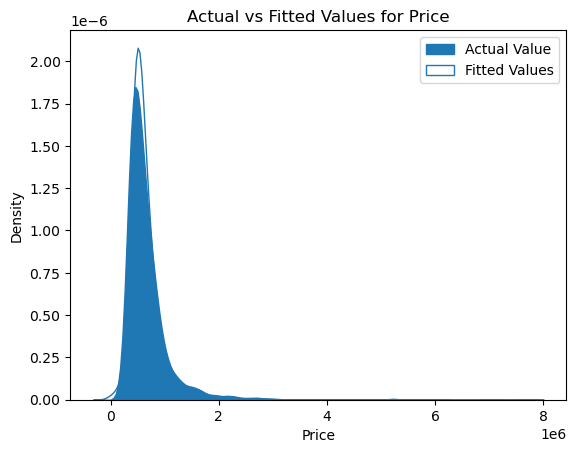

In [67]:
##test size=10%
Tr_ = PolynomialFeatures(degree=2)
lr_=LinearRegression()
#transformation
X_train_tr=Tr_.fit_transform(X_train)
X_test_tr=Tr_.fit_transform(X_test)
#training
lr_.fit(X_train_tr, Y_train)
# Predict on the test set
y_pred = lr_.predict(X_test_tr)
    
# Calculate R-squared error
print(r2_score(Y_test, y_pred))

sns.kdeplot(Y_test, color="r", label="Actual Value",fill=True, alpha=1)#testing set
sns.kdeplot(y_pred, color="b", label="Fitted Values",fill=True, alpha=0)#predicted y data set gotten with a transformed x data.

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

Ridge Regression with Grid Search
To further enhance the model, Ridge regression was used along with Grid Search to find the optimal hyperparameters. Ridge regression helps in managing multicollinearity and can improve the generalization of the model.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

RR=Ridge()#creating the ridge regression object
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]
Grid1 = GridSearchCV(RR, parameters1,cv=10)#GridSearchCV the ridge regression object

Grid1.fit(X_train_tr, Y_train)

# Get the best parameters and best score
best_params = Grid1.best_params_
best_score = Grid1.best_score_

print(f'Best parameters: {best_params}')
print(f'Best cross-validated R-squared: {best_score}')

# Evaluate the model on the test set
Y_pred_r = Grid1.predict(X_test_tr)
test_r2 = r2_score(Y_test, Y_pred_r)

print(f'R-squared on test set: {test_r2}')

Best parameters: {'alpha': 0.0001}
Best cross-validated R-squared: 0.7777485040602881
R-squared on test set: 0.8598418547108287


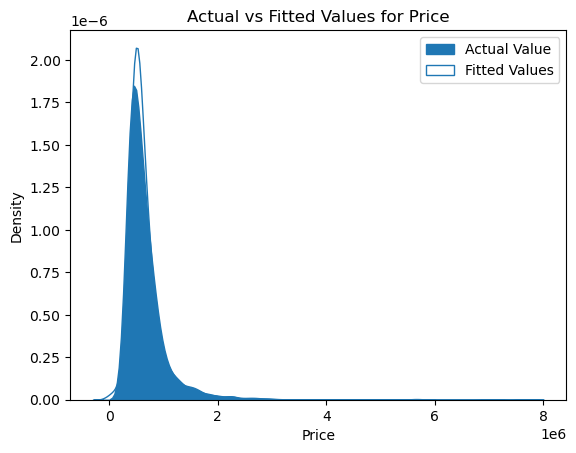

In [77]:
sns.kdeplot(Y_test, color="r", label="Actual Value",fill=True, alpha=1)#testing set
sns.kdeplot(Y_pred_r, color="b", label="Fitted Values",fill=True, alpha=0)#predicted y data set gotten with a transformed x data.

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

<hr>
<div id="Conclusion">
    <h2>8.Conclusion</h2>
</div>

This report provides a comprehensive analysis of house prices in King County, leveraging various features to develop a predictive model. The model demonstrated that the square footage of living space is the most significant predictor of house prices, while the duration since construction had a negative impact. The refined model, using cross-validation, achieved an R-squared value of 0.86317220221015, indicating a good fit and reliability in predicting house prices.

The close R-squared values of the linear regression model and the Ridge regression model suggest that the dataset is well-structured with strong linear relationships between the features and the target variable. The limited presence of multicollinearity and the small regularization parameter for Ridge regression indicate that the linear regression model was already performing well. Therefore, the Ridge regression model only provided a marginal improvement by slightly adjusting the coefficients to enhance generalization.

Overall, both models are effective for predicting house prices in this dataset, with Ridge regression offering a slight advantage in terms of robustness and handling potential multicollinearity. However, the linear regression model's performance is already strong, which is reflected in the close R-squared values.

This analysis can serve as a valuable tool for the Real Estate Investment Trust in making informed investment decisions in the residential real estate market in King County. Further improvements can be made by incorporating more recent data, additional features, and advanced modeling techniques to enhance the predictive power and reliability of the model.